# 모듈 불러오기

#### 기본

In [11]:
import numpy as np
import pandas as pd
import joblib

In [12]:
# !conda install numpy 
# !conda install pandas
# !conda install scikit-learn
# !conda install scipy
# !conda install tensorflow
# !conda install matplotlib
# !conda install seaborn

# !pip install xgboost
# !pip install lightgbm
# !pip install catboost
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension
# !pip install hyperopt
# !pip install -U imbalanced-learn
# !pip install missingno

#### 전처리

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from sklearn import impute
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer

#### 리샘플링

In [14]:
from imblearn.over_sampling import (
    RandomOverSampler, 
    ADASYN, 
    SMOTE
)
from imblearn.under_sampling import (
    RandomUnderSampler, 
    TomekLinks, 
    CondensedNearestNeighbour, 
    OneSidedSelection, 
    EditedNearestNeighbours, 
    NeighbourhoodCleaningRule
)

#### 분석

In [15]:
from scipy.stats import skew, kurtosis
from scipy.stats import ttest_ind, f_oneway, pearsonr

#### 회귀

In [16]:
from sklearn.linear_model import LinearRegression as RL
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBRegressor as XGBR
from lightgbm import LGBMRegressor as LGBMR
from catboost import CatBoostRegressor as CBR

from lightgbm import plot_importance as lgbm_plot_importance
from xgboost import plot_importance as xgb_plot_importance
from catboost import Pool

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

#### 분류

In [17]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGBC
from lightgbm import LGBMClassifier as LGBMC
from catboost import CatBoostClassifier as CBC

from sklearn.metrics import confusion_matrix as cmatrix
from sklearn.metrics import classification_report as creport
from sklearn.metrics import recall_score as recall
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

#### 교차검증

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from catboost import cv
import hyperopt

from sklearn.model_selection import (
    StratifiedKFold, # 분류
    KFold, # 회귀
    # GroupKFold, 
    # RepeatedKFold, 
    # StratifiedGroupKFold, 
    # RepeatedStratifiedKFold
)

#### 시각화

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  

import warnings
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

# 데이터 로드

In [ ]:
folder_name = '건물'
file_name = '건물정보'

df = pd.read_excel(f'../../data/{folder_name}/{file_name}.xlsx', engine='openpyxl')

In [ ]:
df_copy = df.copy()

In [ ]:
df = df_copy.copy()

# 데이터 이해

#### 기본 정보

In [ ]:
df.head()

In [ ]:
df.iloc[:, 20:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602211 entries, 0 to 602210
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   MVMN_RESN   602211 non-null  object
 1   MVM_RES_CD  602211 non-null  object
 2   NTFC_DE     602211 non-null  object
 3   OPERT_DE    602211 non-null  object
 4   POS_BUL_NM  602211 non-null  object
 5   RDS_MAN_NO  602211 non-null  int64 
 6   RDS_SIG_CD  602211 non-null  int64 
 7   RN_CD       602211 non-null  int64 
 8   SIG_CD      602211 non-null  int64 
 9   UND_FLO_CO  602211 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 45.9+ MB


#### 컬럼명 변경

In [ ]:
kor_col = {"BULD_NM": "건축물대장건물명",
"BSI_INT_SN": "기초구간일련번호",
"BUL_MAN_NO": "건물일련번호",
"BUL_ENG_NM": "건물영문명",
"BULD_NM_DC": "상세건물명",
"BDTYP_CD": "건물용도코드",
"BUL_DPN_SE": "건물종속구분",
"GRO_FLO_CO": "지상층수",
"UND_FLO_CO": "지하층수",
"POS_BUL_NM": "시군구용건물명",
"SIG_CD": "시군구코드",
"RN_CD": "도로명코드",
"EMD_CD": "읍면동코드",
"LI_CD": "리코드",
"MNTN_YN": "산여부",
"BULD_MNNM": "건물본번",
"BULD_SLNO": "건물부번",
"RDS_MAN_NO": "도로구간일련번호",
"LNBR_MNNM": "지번본번",
"LNBR_SLNO": "지번부번",
"NTFC_DE": "고시일자",
"MVM_RES_CD": "이동사유코드",
"MVMN_RESN": "이동사유",
"MVMN_DE": "이동일자",
"BULD_SE_CD": "건물구분코드",
"RDS_SIG_CD": "도로구간시군구코드",
"OPERT_DE": "작업일시",
"BSI_ZON_NO": "기초구역번호",
"BD_MGT_SN": "이전건물관리번호",
"EQB_MAN_SN": "건물군일련번호",
}

In [ ]:
df.rename(columns=kor_col, inplace=True)

In [ ]:
df.head()

#### 불필요한 컬럼 제거

In [ ]:
drop_col =\
[
'이전건물관리번호',
'건물구분코드',
'기초구간일련번호',
'기초구역번호',
'건물본번',
'건축물대장건물명',
'상세건물명',
'건물부번',
'건물종속구분',
'건물영문명',
'건물일련번호',
'건물군일련번호',
'리코드',
'지번본번',
'지번부번',
'이동일자',
'이동사유',
'이동사유코드',
'작업일시',
'시군구용건물명',
'도로구간일련번호',
'산여부',
]

In [ ]:
remain_cols =\
[
'건물용도코드',
'지상층수',
'지하층수'
'고시일자',
'시군구코드',
'읍면동코드',
'도로명코드',
'도로구간시군구코드',
]

In [ ]:
df.drop(drop_col, axis=1, inplace=True)

#### 시군구, 행정동 코드

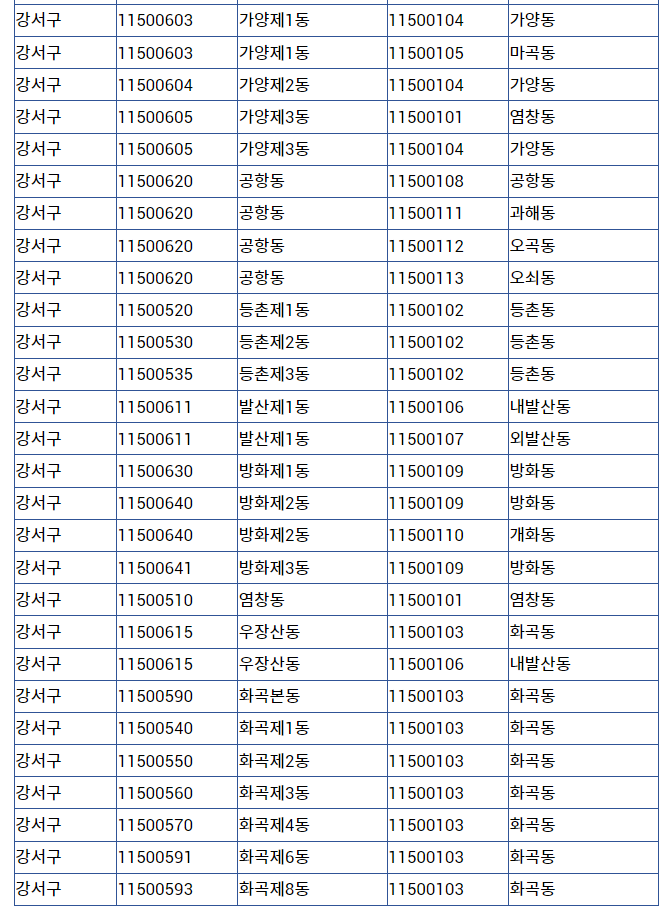

#### 강서구만 추출

In [ ]:
gangseo_df = df.loc[df['시군구코드'] == 11500, :]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 602185 entries, 0 to 602210
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   건물용도코드     602185 non-null  int64 
 1   읍면동코드      602185 non-null  int64 
 2   지상층수       602185 non-null  int64 
 3   고시일자       602185 non-null  object
 4   도로구간시군구코드  602185 non-null  int64 
 5   도로명코드      602185 non-null  int64 
 6   시군구코드      602185 non-null  int64 
 7   지하층수       602185 non-null  int64 
dtypes: int64(7), object(1)
memory usage: 41.3+ MB


#### 컬럼별 데이터 파악

In [ ]:
gangseo_df['지상층수'].value_counts()

2     6246
4     4368
3     3736
5     3222
1     3099
6     1504
0     1238
15     507
7      463
8      253
10     216
14     201
16     162
9      161
12     139
13     102
20      99
11      93
22      45
17      27
19      17
18      13
21       9
25       1
23       1
Name: 지상층수, dtype: int64

In [ ]:
gangseo_df['지하층수'].value_counts()

1     14995
0      9799
2       719
3       212
4        91
5        71
6        24
7         5
10        3
11        1
19        1
8         1
Name: 지하층수, dtype: int64

#### 고시일자 이상한 데이터 제거

In [ ]:
# drop_indx = gangseo_df.loc[gangseo_df['고시일자'].str.len() > 8, :].index
drop_indx_df = df.loc[df['고시일자'].str.len() > 8, :].index
drop_indx_df

Int64Index([   729,   6266,  16926,  34044,  37247,  55639,  85474, 104678,
            114882, 145188, 145189, 162838, 165786, 165966, 166888, 370023,
            403257, 425818, 455071, 473543, 500243, 500244, 522902, 532853,
            533603, 533614],
           dtype='int64')

In [ ]:
df.drop(drop_indx_df, axis=0, inplace=True)

#### 고시일자 to_datetime

In [ ]:
df['고시일자'] = pd.to_datetime(df['고시일자'], format='%Y%m%d')
df['고시일자']

0        2015-11-05
1        2022-01-26
2        2019-03-21
3        2019-03-21
4        2017-08-10
            ...    
602206   2021-12-30
602207   2021-12-30
602208   2021-12-30
602209   2021-12-15
602210   2022-01-06
Name: 고시일자, Length: 602185, dtype: datetime64[ns]

#### csv 파일 저장

In [ ]:
df.to_csv('./data/건물/건물정보_fix.csv', index=False)